<a href="https://colab.research.google.com/github/Nanangk/CNN_with_TensorFlow-Keras/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Convolutional Neural Network With TenserFlow + Keras**

Import Library yang dibutuhkan

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
#Download datanya
(xtrain, ytrain),(xtest, ytest) = mnist.load_data()

Mari kita cek Jumlah data dan sizenya

In [102]:
xtrain.shape

(60000, 28, 28)

In [103]:
xtest.shape

(10000, 28, 28)

Terdapat 60.000 Gambar data training dan 1000 gambar data testing dengan size 28 x 28 piksel

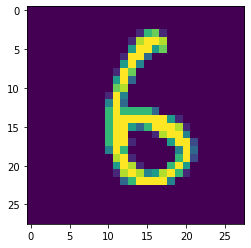

In [104]:
#coba cek gambarnya
plt.imshow(xtest[3000])

In [105]:
ytest[3000]

6

In [106]:
#cek ytrain masih berupa numerical
ytrain[3000]

9

In [0]:
xtrain = xtrain.reshape(60000, 28,28,1)
xtest = xtest.reshape(10000,28,28,1)

In [0]:
#konversi ytrain dan ytest dari numerical ke ctegorical
ytrain = keras.utils.to_categorical(ytrain, 10)
ytest = keras.utils.to_categorical(ytest, 10)

Buat Model CNN nya

In [0]:
model = Sequential()

In [110]:
model.add(Conv2D(32, kernel_size = (3,3), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation=Activation(tf.nn.softmax)))


/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as Activation) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Liat Bentuk Modelnya

In [111]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                802880    
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)               

Compile Modelnya

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

Waktunya Mentraining

In [113]:
model.fit(xtrain, ytrain, 
          batch_size=128, 
          epochs=5, 
          verbose=1,
          validation_data=(xtest, ytest))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 93us/step - loss: 0.9140 - accuracy: 0.8374 - val_loss: 0.0821 - val_accuracy: 0.9745
Epoch 2/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.1109 - accuracy: 0.9680 - val_loss: 0.0511 - val_accuracy: 0.9835
Epoch 3/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.0727 - accuracy: 0.9787 - val_loss: 0.0474 - val_accuracy: 0.9852
Epoch 4/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.0551 - accuracy: 0.9835 - val_loss: 0.0402 - val_accuracy: 0.9886
Epoch 5/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.0432 - accuracy: 0.9870 - val_loss: 0.0392 - val_accuracy: 0.9883


Coba Predict

In [114]:
xd = model.predict(xtest[11].reshape(1,28,28,1))
xd

array([[2.70071291e-06, 5.04402401e-13, 1.17978943e-11, 1.86363815e-12,
        2.35532492e-12, 2.80594645e-12, 9.99997258e-01, 1.27907515e-14,
        2.14110174e-09, 2.70239340e-15]], dtype=float32)

In [115]:
ytest[11]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [116]:
#mari kita uji
def uji(xd):
  a_max = xd.max()
  mylist = xd[0]
  i=0
  for i in range(len(mylist)):
    if mylist[i] == a_max:
      print(str(a_max * 100)+ '% menunjukkan ini angka :' +str(i))
    i+=1
   
uji(xd)

99.99972581863403% menunjukkan ini angka :6
